In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import random

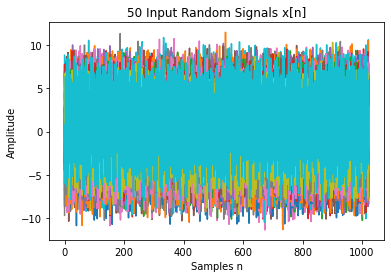

In [33]:
#orismos tuxaiwn simatwn

w1=0.4*np.pi
w2=0.5*np.pi
w3=0.8*np.pi
N=1024

n=np.linspace(0,N-1,N)

f=np.fft.rfftfreq(N) #kratame miso aksona-logw simmetrias


N=1024 #stathero
win_length=64
overlap=int(win_length/2)
windows=int(N/win_length)

mean=0 #statistical identities of random variables
std=1

u = np.random.normal(mean, std, size = N)

x=[]

for i in range(0,50):
    phi1=random.uniform(0,2*np.pi)
    phi2=random.uniform(0,2*np.pi)
    u = np.random.normal(mean, std, size = N)
    x.append(3*np.cos(w1*n+phi1)+np.sin(w2*n+phi2)+5*np.sin(w3*n+phi2)+u)


plt.title("50 Input Random Signals x[n]")
plt.ylabel("Amplitude")
plt.xlabel("Samples n")
for i in range (0,50):
    plt.plot(n,(x[i]))

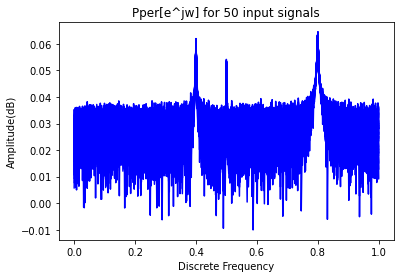

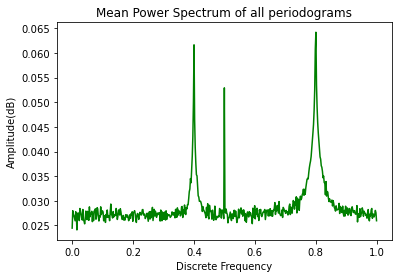

In [28]:
#periodogramma

plt.title("Pper[e^jw] for 50 input signals")
plt.xlabel("Discrete Frequency")
plt.ylabel("Amplitude(dB)")

periodogram=[]
for i in range(0,50):
    x_dft=np.fft.rfft(x[i])
    periodogram.append((10*np.log10(abs(x_dft**2)) / ((N)))) #se dB
    plt.plot(2*f,periodogram[i],color='blue')
plt.show()

mean_per=np.mean(periodogram,axis=0) 
plt.plot(2*f,mean_per,color='green')
plt.xlabel("Discrete Frequency")
plt.ylabel("Amplitude(dB)")
plt.title("Mean Power Spectrum of all periodograms")
plt.show()
    



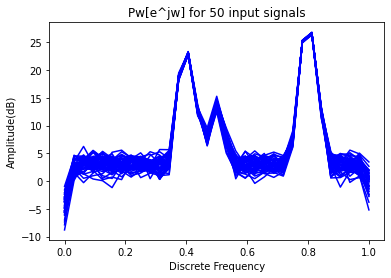

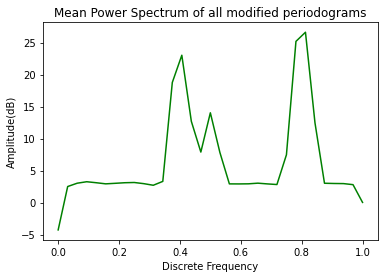

In [27]:
#welch periodogramma

plt.title("Pw[e^jw] for 50 input signals")
plt.xlabel("Discrete Frequency")
plt.ylabel("Amplitude(dB)")

per_mod=[]
f_welch=[]
for i in range(0,50):
    x_welch=signal.welch(x[i],1.0,window='hamming',nperseg=win_length,noverlap=0)
    f_welch.append(x_welch[0])  #FREQ_RESULT OF WELCH()
    per_mod.append(10*np.log10(x_welch[1])) #se dB #Spectrum result of welch()
    plt.plot(2*f_welch[i],per_mod[i],color='blue')
plt.show()
    
mean_welch=np.mean(per_mod,axis=0)
f_mean_welch=np.mean(f_welch,axis=0)
plt.plot(2*f_mean_welch,mean_welch,color='green')
plt.xlabel("Discrete Frequency")
plt.ylabel("Amplitude(dB)")
plt.title("Mean Power Spectrum of all modified periodograms")
plt.show()

